In [34]:
!python -V

Python 3.9.7


In [111]:
%matplotlib inline
from numpy import heaviside, sign, hstack, absolute, all, dot, array, random
from scipy.integrate import solve_ivp
from pylab import subplot, plot, yscale, ylabel
import pandas as pd
import statistics as stats
plt.rcParams.update({'font.size': 16})

In [112]:
def f(t,y,po,k,sn):
    N=y[:sn]
    p=y[sn:]
    r=heaviside(1-absolute(p-po),1)
    dN_dt=r*N-d*N    #adding a lotka volterra term (1-N) makes dynamics more stable
    dp_dt=dot(k,N)-d*p  # this assumes that p in the inflowing media is 0
    return hstack([dN_dt,dp_dt])

## Two interacting species

In [113]:
#number of species
sn=2

#number of toxins
pn=1
  
#intial values 
N_ini=[0.1,0.01] #initial population densities

p_ini=[0]*pn #initial p values

y0=hstack([N_ini,p_ini])

#optimal p values for species
po=array([-1,+1]) # length has to be sn

#dilution rate
d=0.1

#change of p by species
k=array([-0.1,0.2])    # dimension has to be sn x pn 

In [114]:
#solve equations
res=solve_ivp(f,[0,100],y0,args=(po,k,sn))

Text(0, 0.5, 'toxin')

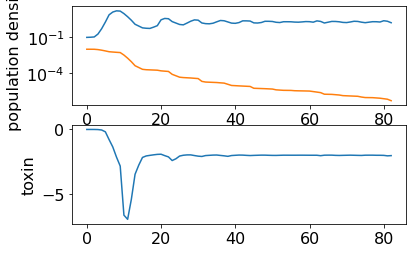

In [115]:
NN=res.y[:2]
pp=res.y[2:]
subplot(211)
plot(NN.T)
ylabel('population density')
yscale('log')
subplot(212)
plot(pp.T)
ylabel('toxin')


### Growth of single species: Finding p{stst}

In [116]:
def fm(t,y,po,k,sn):
    N=y[:sn]
    p=y[sn:]
    r=(all(heaviside(1- 0.2*(absolute(p-po)),1), axis=1))
    dN_dt=(r-d)*N    #adding a lotka volterra term (1-N) makes dynamics more stable
    dp_dt=dot(k,N)-d*p  # this assumes that p in the inflowing media is 0
    return hstack([dN_dt,dp_dt]) 

In [117]:
#Create dataframes to store po and k values

#k_vals_new = pd.DataFrame(columns = ['Sp1','Sp2','Sp3','Sp4','Sp5','Sp6','Sp7','Sp8'])
#po_vals_new = pd.DataFrame(columns = ['Sp1','Sp2','Sp3','Sp4','Sp5','Sp6','Sp7','Sp8'])

#number of species
sn=1

#number of toxins
pn=3

#random parameters

#optimal p values for species
po=(random.rand(sn,pn)-0.4)*5 # dimension has to be sn*pn

#change of p by species 

k=10e-3*(random.rand(pn,sn))*sign(po).T # microbes change toxin concentration in the direction they prefer (without that many communities are not multistable (? not rigorously tested))

#Store all values in dataframes and then into csv files

In [118]:
#intial values 
N_ini=[10] #initial population densities, i got ok results for setting high popluatoi to 1 and low to 0.1

p_ini=[0,0,0] #initial p values

y0=hstack([N_ini,p_ini])

#dilution rate
d=0.1

In [121]:
#solve equations
res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po,k,sn))

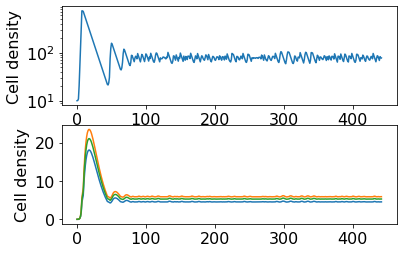

In [122]:
#p_vals_new = []

subplot(211)
plot(res.y[:sn].T)
plt.ylabel('Cell density')
yscale('log')

subplot(212)
plot(res.y[sn:].T)
plt.ylabel('Cell density')
#print(res.y[sn:])

listx = (res.y[sn:])
final = [len(sublist) for sublist in listx]
#print(final)
final_comp = [stats.mean(sublist[-20:]) for sublist in listx] #mean of last 20 values in the simulation
#print(final_comp)

#append pstst values to the list pstst_1 (species set 1)
#p_vals_new.append(final_comp)
#print(p_vals_new)

In [15]:
# k_vals_new1 = k_vals_new.copy()
# po_vals_new1 = po_vals_new.copy()
# p_vals_new1 = p_vals_new.copy()
# p_vals_new1

In [16]:
# k_vals_new1.to_csv('2nd_K_values_final.csv')
# po_vals_new1.to_csv('2nd_P_opti_values_final.csv')

## 8 species

In [123]:
%matplotlib inline
from numpy import heaviside, sign, hstack, absolute, all, dot, random
import pandas as pd
from scipy.integrate import solve_ivp
#from scipy import random
from pylab import subplot, plot, yscale, imshow, colorbar
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,10)

In [124]:
def fm(t,y,po,k,sn):
    N=y[:sn]
    p=y[sn:]
    r=(all(heaviside(1-0.2*(absolute(p-po)),1), axis=1))
    dN_dt=(r-d)*N    #adding a lotka volterra term (1-N) makes dynamics more stable
    dp_dt=dot(k,N)-d*p  # this assumes that p in the inflowing media is 0
    return hstack([dN_dt,dp_dt]) 

In [125]:
#number of species
sn=8

#number of toxins
pn=3

#dilution rate
d=0.1

In [126]:
import pandas as pd
import statistics as stats
columns = ['Species','No Sup', 'Sup1', 'Sup2', 'Sup3', 'Sup4', 'Sup5', 'Sup6', 'Sup7', 'Sup8']
df1_1 = pd.DataFrame(columns = columns) #Dataframe to store final composition data for Species set 1, Community 1
df1_2 = pd.DataFrame(columns = columns) #Dataframe to store final composition data for Species set 1, Community 2
df1_3 = pd.DataFrame(columns = columns)
df1_4 = pd.DataFrame(columns = columns)
df1_5 = pd.DataFrame(columns = columns)
df1_6 = pd.DataFrame(columns = columns)
df1_7 = pd.DataFrame(columns = columns)
df1_8 = pd.DataFrame(columns = columns)

Species = ['Species 1', 'Species 2', 'Species 3', 'Species 4', 'Species 5', 'Species 6', 'Species 7', 'Species 8']
df1_1['Species'] = Species
df1_2['Species'] = Species
df1_3['Species'] = Species
df1_4['Species'] = Species
df1_5['Species'] = Species
df1_6['Species'] = Species
df1_7['Species'] = Species
df1_8['Species'] = Species

dfs = [df1_1, df1_2, df1_3, df1_4, df1_5, df1_6, df1_7, df1_8]

In [127]:
# Choosing initial community composition from set of ODs

# ODs = [0.1,1,10]
# N_list = []
# for i in range(8):
#     x = np.random.choice(ODs)
#     N_list.append(x)
# print(N_list)

In [128]:
from Parameter_values_CM_Simulations_Heaviside_function import N1, N2, N3, N4, N5, N6, N7, N8, N_inis, po_1, k_1, stat_p_1, Nx1, Nx2, Nx3, Nx4, Nx5, Nx6, Nx7, Nx8, Nx_inis, po_2, k_2, stat_p_2

In [129]:
print(k_1)

[[0.000374247426106, 0.0083874857326442, 0.0094160404785469, 0.0038932693618614, 0.0010149825116948, 0.0095410451095542, 0.0039838947391378, 0.0023915925435848], [0.0046690013213651, 0.0011335284547248, -0.0075683527017838, -0.0018861735770932, 0.0083287661674627, 0.0068313865548772, -0.0076873229598324, 0.007898127419221], [0.0014053580791963, -0.0050756855950393, 0.0045699205874336, -0.0098376354068452, 0.0074200111496214, 0.0038380107113311, -0.0083622280321699, -0.0064919919191809]]


In [130]:
#Initial composition of communities in species SET 1 
N1 = [1.0, 1.0, 10.0, 0.1, 10.0, 1.0, 1.0, 1.0]
N2 = [0.1, 10.0, 1.0, 10.0, 1.0, 1.0, 1.0, 10.0]
N3 = [0.1, 10.0, 0.1, 1.0, 1.0, 0.1, 1.0, 0.1]
N4 = [10.0, 0.1, 10.0, 1.0, 10.0, 0.1, 1.0, 1.0]
N5 = [1.0, 1.0, 1.0, 10.0, 0.1, 10.0, 1.0, 0.1]
N6 = [0.1, 0.1, 1.0, 1.0, 10.0, 0.1, 10.0, 1.0]
N7 = [0.1, 10.0, 0.1, 0.1, 1.0, 10.0, 0.1, 1.0]
N8 = [10.0, 10.0, 0.1, 0.1, 1.0, 0.1, 10.0, 0.1]

N_inis = [N1, N2, N3, N4, N5, N6, N7, N8]

#optimum p values for species set 1
po_1 = [[2.713003998247232, 0.139289405818383, 0.8001930063847212],
 [0.7794993313406384, 1.2759637454171062, -0.7998059957021125],
 [1.5098142935960364, -1.4811003056633032, 1.2566259050859148],
 [0.95027143716287, -0.6899650702014687, -0.3479107394212832],
 [0.0377244571795382, 0.506089441846298, 2.564932374845285],
 [0.1242892778074705, 2.2943881440989418, 1.3373288899328517],
 [0.4154587645468727, -1.46425386465133, -1.6093061192308706],
 [1.8778586058145623, 2.0097319857496343, -1.694521537614474]]

#k values for species set 1
k_1 = [[0.000374247426106, 0.0083874857326442, 0.0094160404785469, 0.0038932693618614, 0.0010149825116948, 0.0095410451095542, 0.0039838947391378, 0.0023915925435848], 
 [0.0046690013213651, 0.0011335284547248, -0.0075683527017838, -0.0018861735770932, 0.0083287661674627, 0.0068313865548772, -0.0076873229598324, 0.007898127419221], 
 [0.0014053580791963, -0.0050756855950393, 0.0045699205874336, -0.0098376354068452, 0.0074200111496214, 0.0038380107113311, -0.0083622280321699, -0.0064919919191809]]

#Steady state pstst values of species set 1
stat_p_1 = [[0.4152029676222001, 5.179950666950994, 1.5591525935806827],
 [5.859027607276696, 0.7918194702875607, -3.545589581326963],
 [6.575282327381421, -5.2850299317222476, 3.1912052783279754],
 [2.1322438475353973, -1.0330089267746052, -5.38782078014578],
 [0.6761153816006729, 5.548082701616136, 4.942729172279614],
 [5.179721147978467, 3.7086793953923882, 2.083610864363515],
 [3.1680083599657087, -6.1129886699205445, -6.649675769191379],
 [2.1373549170175514, 7.058519027409075, -5.801862397890244]]

#Initial composition of communities in species SET 2 
Nx1 = [1.0, 10.0, 0.1, 1.0, 0.1, 1.0, 0.1, 10.0]
Nx2 = [10.0, 0.1, 10.0, 10.0, 0.1, 0.1, 1.0, 0.1]
Nx3 = [0.1, 0.1, 1.0, 0.1, 10.0, 1.0, 10.0, 0.1]
Nx4 = [0.1, 0.1, 1.0, 1.0, 0.1, 10.0, 1.0, 1.0]
Nx5 = [1.0, 1.0, 10.0, 10.0, 0.1, 0.1, 1.0, 1.0]
Nx6 = [10.0, 0.1, 0.1, 0.1, 1.0, 0.1, 0.1, 0.1]
Nx7 = [0.1, 0.1, 1.0, 10.0, 0.1, 0.1, 1.0, 1.0]
Nx8 = [1.0, 1.0, 0.1, 1.0, 0.1, 10.0, 1.0, 0.1]

Nx_inis = [Nx1, Nx2, Nx3, Nx4, Nx5, Nx6, Nx7, Nx8]

#optimum p values for species set 2
po_2 = [[2.083618186126745, -0.4964625070222372, 2.4055460605375067], 
 [-1.1874621589909555, 1.8965939090375985, 2.7611998741872097], 
 [-1.3248800029491132, 0.3122402556763587, 1.7496078896838352], 
 [-1.238128694541611, -1.806022869442398, 1.9244436260743352], 
 [-0.3546773648113632, 1.3407197583574693, -1.3222985273554926], 
 [-0.5462982970934133, 2.2257827542037707, 0.6654456396929209], 
 [1.87057684360928, 2.750124068280455, -1.2628103462112006], 
 [2.172405533430484, 1.7637907614305033, 1.26260970541467]]

#k values for species set 2
k_2 = [[0.000815563008833, -0.0032975183084405, -0.0059487605292003, -0.0016166455270076, -0.0040638160516225, -0.0061216684807223, 5.766663822882268e-05, 0.0027891389352807],
       [-0.0007485470294505, 0.0050257156568747, 0.006097409754192, -0.0015890695621417, 0.0035726563128657, 0.0021598647966746, 0.0015674562761535, 0.0028338188194987],
       [0.003597135331251, 0.0009675337311898, 0.0016354907507464, 0.0016339259431402, -0.001277124128696, 0.0027919040055058, -0.0010943568263412, 0.0096092638884779]]
#Steady state pstst values of species set 2
stat_p_2 = [[1.6893375546562683, -1.5505222706048918, 7.45101940432329],
  [-4.540333339100615, 6.919877985617531, 1.332191437779516],
  [-5.228292932315832, 5.3589389195939505, 1.4374128343245394],
  [-6.262477048958972, -6.155654715806284, 6.3294170228856],
  [-5.377824002519484, 4.727851021802767, -1.6900737401133614],
  [-5.58951680739605, 1.972109502619031, 2.5492060559231793],
  [0.2893805576083479, 7.865750200664465, -5.491660314452882],
  [1.8278520706479053, 1.8571328704858856, 6.297396186966438]]


In [131]:
for x,y in zip(stat_p_1, np.arange(1,9)):
    p_ini = x
    y0=hstack([N1,p_ini])
    res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po_1,k_1,sn))
    listx = (res.y[:sn])
    final = [len(sublist) for sublist in listx]
    final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
    print(final_comp)
    #try_newdf_8['Sup'+str(y)] = final_comp
#try_newdf_8

[3.1781573144707598e-12, 1.0655866071294235e-11, 2.0569171372015377e-12, 2.0569171372015385e-14, 5.562691427186274e-11, 4.238215873481502e-08, 2.0569171372015361e-13, 92.73528039382067]
[7.032958382347061e-09, 1.8966291360557985e-10, 2.8705141410638267e-10, 5.429021431225989e-13, 2.272804143294939e-12, 1.863674795769706e-10, 5.224013972686173e-13, 93.13977838974282]
[1.5180430963603207e-07, 5.559577656641805e-10, 3.9886121919588786e-10, 5.935257010430278e-14, 1.9089858686059556e-10, 5.601758498063051e-07, 2.2152955230114168e-13, 91.42967097955902]
[1.6628621037599515e-12, 5.572580657772556e-11, 2.2692725168091905e-12, 4.335560124465443e-12, 2.2692725168091905e-12, 2.2692725168091948e-13, 1.7605308213329766e-09, 90.38870423710028]
[1.0077648249811884e-09, 5.839003942125836e-10, 2.057437899023583e-12, 2.0574378990235784e-14, 9.402341776225215e-11, 1.6084417986249808e-09, 2.0574378990235823e-13, 90.550709053066]
[4.464935070782419e-08, 4.158071285234963e-09, 4.4245809702785905e-10, 8.5500

In [132]:
for i, (dfx, N_ini) in enumerate(zip(dfs, N_inis), start=1):
    for x,y in zip(stat_p_1, np.arange(1,9)):
        p_ini = x
        print(p_ini)
        y0=hstack([N_ini,p_ini])
        res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po_1,k_1,sn))
        listx = (res.y[:sn])
        final = [len(sublist) for sublist in listx]
        print(final)
        final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
        final_comp
        dfx.loc[:, 'Sup'+str(y)] = final_comp
        print(dfx)
        #df['Sup'+str(y)] = final_comp

    p_ini = [0,0,0]
    y0=hstack([N_ini,p_ini])
    res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po_1,k_1,sn))
    listx = (res.y[:sn])
    final = [len(sublist) for sublist in listx]
    print(final)
    final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
    final_comp
    dfx.loc[:, 'No Sup'] = final_comp
    print(dfx)

[0.4152029676222001, 5.179950666950994, 1.5591525935806827]
[366, 366, 366, 366, 366, 366, 366, 366]
     Species No Sup      Sup1 Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN       0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  92.73528  NaN  NaN  NaN  NaN  NaN  NaN  NaN
[5.859027607276696, 0.7918194702875607, -3.545589581326963]
[373, 373, 373, 373, 373, 373, 373, 373]
     Species No Sup      Sup1       Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN       0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN       0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN


[356, 356, 356, 356, 356, 356, 356, 356]
     Species No Sup       Sup1 Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  91.303644  NaN  NaN  NaN  NaN  NaN  NaN  NaN
[5.859027607276696, 0.7918194702875607, -3.545589581326963]
[370, 370, 370, 370, 370, 370, 370, 370]
     Species No Sup       Sup1       Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0        0.0  NaN  

[367, 367, 367, 367, 367, 367, 367, 367]
     Species No Sup       Sup1 Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  89.368703  NaN  NaN  NaN  NaN  NaN  NaN  NaN
[5.859027607276696, 0.7918194702875607, -3.545589581326963]
[361, 361, 361, 361, 361, 361, 361, 361]
     Species No Sup       Sup1       Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0        0.0  NaN  

[416, 416, 416, 416, 416, 416, 416, 416]
     Species No Sup       Sup1 Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN  41.757728  NaN  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN        0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  55.476049  NaN  NaN  NaN  NaN  NaN  NaN  NaN
[5.859027607276696, 0.7918194702875607, -3.545589581326963]
[372, 372, 372, 372, 372, 372, 372, 372]
     Species No Sup       Sup1       Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0        0.0  NaN  

[359, 359, 359, 359, 359, 359, 359, 359]
     Species No Sup       Sup1       Sup2 Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN  38.557056        0.0  NaN  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN        0.0        0.0  NaN  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  57.346704  90.299683  NaN  NaN  NaN  NaN  NaN  NaN
[6.575282327381421, -5.2850299317222476, 3.1912052783279754]
[362, 362, 362, 362, 362, 362, 362, 362]
     Species No Sup       Sup1       Sup2       Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0        0.0 

[384, 384, 384, 384, 384, 384, 384, 384]
     Species No Sup       Sup1       Sup2       Sup3 Sup4 Sup5 Sup6 Sup7 Sup8
0  Species 1    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
1  Species 2    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
2  Species 3    NaN        0.0        0.0  71.778764  NaN  NaN  NaN  NaN  NaN
3  Species 4    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
4  Species 5    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
5  Species 6    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
6  Species 7    NaN        0.0        0.0        0.0  NaN  NaN  NaN  NaN  NaN
7  Species 8    NaN  94.891265  92.119734        0.0  NaN  NaN  NaN  NaN  NaN
[2.1322438475353973, -1.0330089267746052, -5.38782078014578]
[359, 359, 359, 359, 359, 359, 359, 359]
     Species No Sup       Sup1       Sup2       Sup3     Sup4 Sup5 Sup6 Sup7  \
0  Species 1    NaN        0.0        0.0        0.0      0.0  NaN  NaN  Na

[367, 367, 367, 367, 367, 367, 367, 367]
     Species No Sup       Sup1       Sup2       Sup3       Sup4 Sup5 Sup6  \
0  Species 1    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
1  Species 2    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
2  Species 3    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
3  Species 4    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
4  Species 5    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
5  Species 6    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
6  Species 7    NaN        0.0        0.0        0.0        0.0  NaN  NaN   
7  Species 8    NaN  90.360038  91.029548  91.701904  93.027994  NaN  NaN   

  Sup7 Sup8  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN  
4  NaN  NaN  
5  NaN  NaN  
6  NaN  NaN  
7  NaN  NaN  
[0.6761153816006729, 5.548082701616136, 4.942729172279614]
[372, 372, 372, 372, 372, 372, 372, 372]
     Species No Sup       Sup1       Su

[383, 383, 383, 383, 383, 383, 383, 383]
     Species No Sup       Sup1       Sup2       Sup3       Sup4       Sup5  \
0  Species 1    NaN        0.0        0.0   0.000001        0.0        0.0   
1  Species 2    NaN        0.0        0.0        0.0        0.0        0.0   
2  Species 3    NaN        0.0        0.0        0.0        0.0        0.0   
3  Species 4    NaN        0.0        0.0        0.0        0.0        0.0   
4  Species 5    NaN        0.0        0.0        0.0        0.0        0.0   
5  Species 6    NaN        0.0        0.0        0.0        0.0        0.0   
6  Species 7    NaN        0.0        0.0        0.0  84.795575        0.0   
7  Species 8    NaN  91.620928  95.020167  91.109882        0.0  92.331377   

  Sup6 Sup7 Sup8  
0  NaN  NaN  NaN  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN  
5  NaN  NaN  NaN  
6  NaN  NaN  NaN  
7  NaN  NaN  NaN  
[5.179721147978467, 3.7086793953923882, 2.083610864363515]
[349, 349, 349, 349, 349, 

In [133]:
df1_1

,Species,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,Species 1,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Species 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Species 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Species 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Species 5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Species 6,41.001021,0.0,0.0,0.000001,0.0,0.0,39.3734,0.0,0.0
6,Species 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.088132,0.0
7,Species 8,54.128508,92.73528,93.139778,91.429671,90.388704,90.550709,54.707186,0.0,90.332093


## Plot trajectories of Cell density and Environmental variables

In [134]:
#solve equations

p_ini= stat_p_1[2]  #initial p values
# p_ini = [0,0,0]
print(p_ini)

y0=hstack([N6,p_ini])

res=solve_ivp(fm,[0,300],y0,max_step=1, args=(po_1,k_1,sn))
# listx = (res.y[:sn])
# final = [len(sublist) for sublist in listx]
# print(final)
# final_comp = [stats.mean(sublist[-20:]) for sublist in listx]
# final_comp

[6.575282327381421, -5.2850299317222476, 3.1912052783279754]


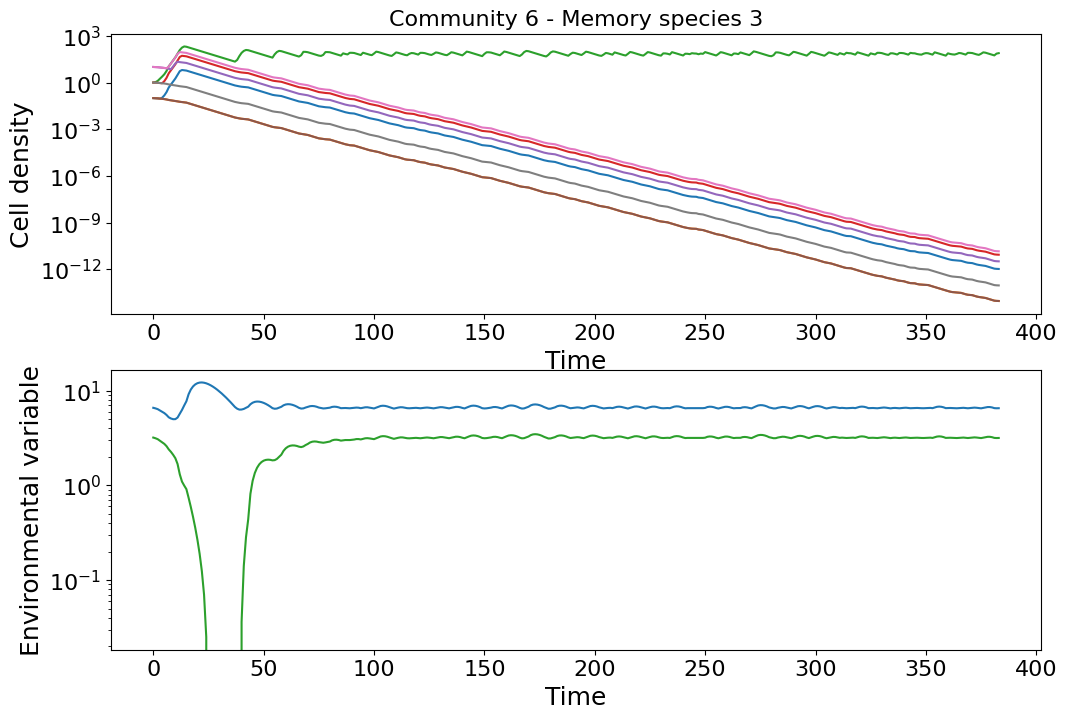

In [135]:
import matplotlib.style
import matplotlib as mpl
from matplotlib import cm

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
mpl.style.use('default')
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

fig = plt.figure()
y1 = fig.add_subplot(211)
y1.plot(res.y[:sn].T)
y1.set_yscale('log')
y1.set_ylabel('Cell density', fontsize = 18)
y1.set_xlabel('Time', fontsize = 18)
y1.set_title('Community 6 - Memory species 3', fontsize = 16)

y2 = fig.add_subplot(212)
plot(res.y[sn:].T)
y2.set_yscale('log')
y2.set_ylabel('Environmental variable', fontsize = 18)
y2.set_xlabel('Time', fontsize = 18)

#plt.savefig('Supplementary Fig7J.svg', bbox_inches = 'tight')

## Calculating Bray curtis dissimilarities

### ALL DFs

In [136]:
import pandas as pd
pd.set_option('display.max_rows', 500)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
df_1 = df1_1.iloc[:8,1:10]
df_2 = df1_2.iloc[:8,1:10]
df_3 = df1_3.iloc[:8,1:10]
df_4 = df1_4.iloc[:8,1:10]
df_5 = df1_5.iloc[:8,1:10]
df_6 = df1_6.iloc[:8,1:10]
df_7 = df1_7.iloc[:8,1:10]
df_8 = df1_8.iloc[:8,1:10]
dfx = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8], axis = 1)
# df2x.to_csv('try_1st set N - 2nd SET Pstat Po K_Rand_new_df2x.csv', index = False)
#df2x = pd.read_csv('try_1st set N - 2nd SET Pstat Po K_Rand_new_df2x.csv')
dfx

,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8,No Sup,...,Sup8,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,0.000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000001,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,41.001021,0.0,0.0,0.000001,0.0,0.0,39.3734,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81.088132,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,84.795575,0.0,0.0,81.613148,0.0
7,54.128508,92.73528,93.139778,91.429671,90.388704,90.550709,54.707186,0.0,90.332093,88.583648,...,92.518391,87.545141,91.620928,95.020167,91.109882,0.0,92.331377,89.76455,0.0,92.416269


      No Sup       Sup1       Sup2       Sup3       Sup4       Sup5      Sup6  \
0        0.0        0.0        0.0   0.000001        0.0        0.0       0.0   
1        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
2        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
4        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
5        0.0        0.0        0.0        0.0        0.0        0.0       0.0   
6        0.0        0.0        0.0        0.0  84.795575        0.0       0.0   
7  87.545141  91.620928  95.020167  91.109882        0.0  92.331377  89.76455   

        Sup7       Sup8  
0        0.0        0.0  
1        0.0        0.0  
2        0.0        0.0  
3        0.0        0.0  
4        0.0        0.0  
5        0.0        0.0  
6  81.613148        0.0  
7        0.0  92.416269  


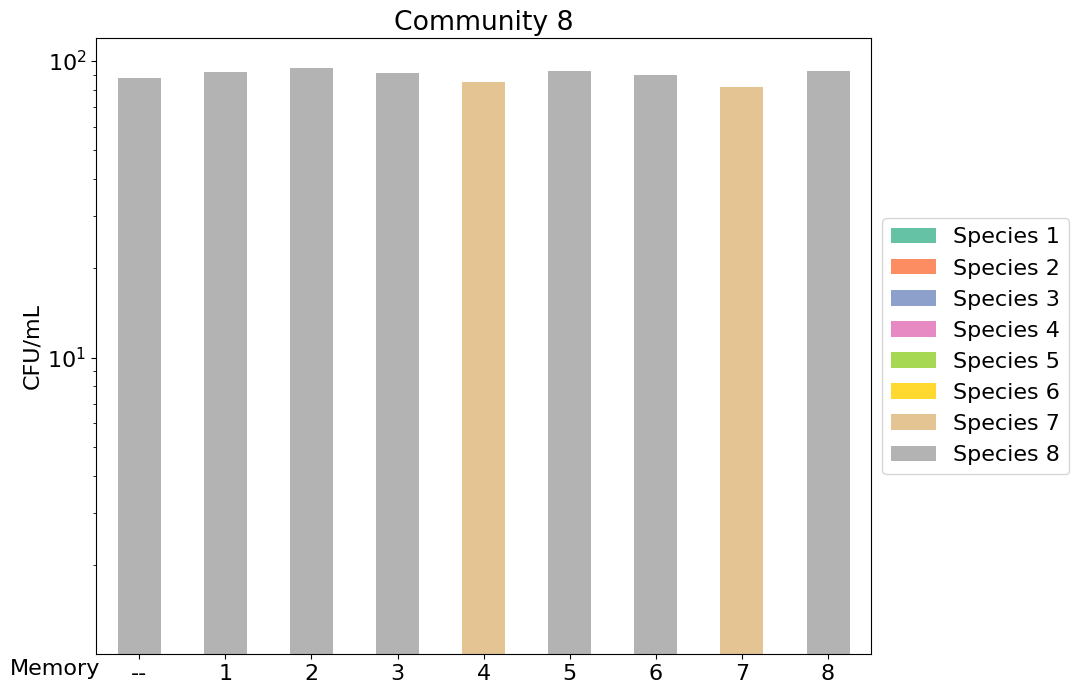

In [138]:
df1 = dfx.iloc[:,63:]
print(df1)
cmap = plt.cm.Set2
ldf12 = df1.values.tolist()
ldf12 = np.asarray(ldf12)
ldf12 = np.transpose(ldf12)
#print(ldf12)
d = np.zeros(ldf12.shape)
#print(d)

for j,row in enumerate(ldf12):
    g = np.zeros(len(row)+1)
    #print(g)
    total_cfu = np.sum(row)
    #print(total_cfu)
    g[1:] = np.cumsum(row)
    #print(g)
    f = 10**(g/total_cfu*np.log10(total_cfu))
    f = np.nan_to_num(f)
    #print(f)
    f[0] = 0
    d[j, :] = np.diff( f )
    #print(d)
    
sups = ['--','1', '2', '3', '4', '5', '6', '7', '8']
df2 = pd.DataFrame(d, columns = Species)
#print(df2)
#axes[1].set_title("log total barheight\nlinear stack distribution")

df2.plot.bar(stacked=True, log=True, colormap = cmap,legend = False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8],labels = sups, rotation = 0)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Community 8')
plt.ylabel('CFU/mL')

x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
plt.text(3*x0,0.85*y0 ,'Memory')

plt.show()

In [139]:
#df2x = pd.read_csv('2Rand6_new_df2x.csv')
df3x = dfx.copy()
df3x = df3x.astype(float)
df3x[df3x < 0.001] = 0
#df3x.to_csv('Zeroed_Rand6_new_df2x.csv', index = False)
df3x

,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8,No Sup,...,Sup8,No Sup,Sup1,Sup2,Sup3,Sup4,Sup5,Sup6,Sup7,Sup8
0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,41.001021,0.00000,0.000000,0.000000,0.000000,0.000000,39.373400,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,81.088132,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,84.795575,0.000000,0.00000,81.613148,0.000000
7,54.128508,92.73528,93.139778,91.429671,90.388704,90.550709,54.707186,0.000000,90.332093,88.583648,...,92.518391,87.545141,91.620928,95.020167,91.109882,0.000000,92.331377,89.76455,0.000000,92.416269


## NMDS

In [140]:
from scipy.spatial.distance import braycurtis
from numpy import zeros
from sklearn.manifold import MDS
np.set_printoptions(threshold=5000)


bc_matrix=zeros([len(dfx.T),len(dfx.T)])
#print(bc_matrix)
for j in range(len(dfx.T)):
    for k in range(len(dfx.T)):
        bc_matrix[j,k] = braycurtis(dfx.T.iloc[j], dfx.T.iloc[k])
#print(bc_matrix)

print(bc_matrix.max())

inf_indices = np.where(np.isinf(bc_matrix))
print(inf_indices)

nan_indices = np.where(np.isnan(bc_matrix))
print(nan_indices)

#df_describe = pd.DataFrame(bc_matrix)
#print(df_describe.describe())

##nmds with precomputed bray curtis matrix
#coms_m=vstack(coms)

embedding = MDS(n_components=2, dissimilarity='precomputed', metric = 'False', max_iter = 1000, n_init = 10)
coms_m_tr = embedding.fit_transform(bc_matrix)
coms_m_tr.shape
python_nmds = pd.DataFrame()
x1 = []
y1 = []
for i in coms_m_tr:
    x1.append(i[0])
    y1.append(i[1])

Supsx = ['No Sup', 'Sup1', 'Sup2', 'Sup3', 'Sup4', 'Sup5', 'Sup6', 'Sup7', 'Sup8'] * 8
python_nmds['Species'] = Supsx
python_nmds['MDS1'] = x1
python_nmds['MDS2'] = y1


0.9999999999999931
(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


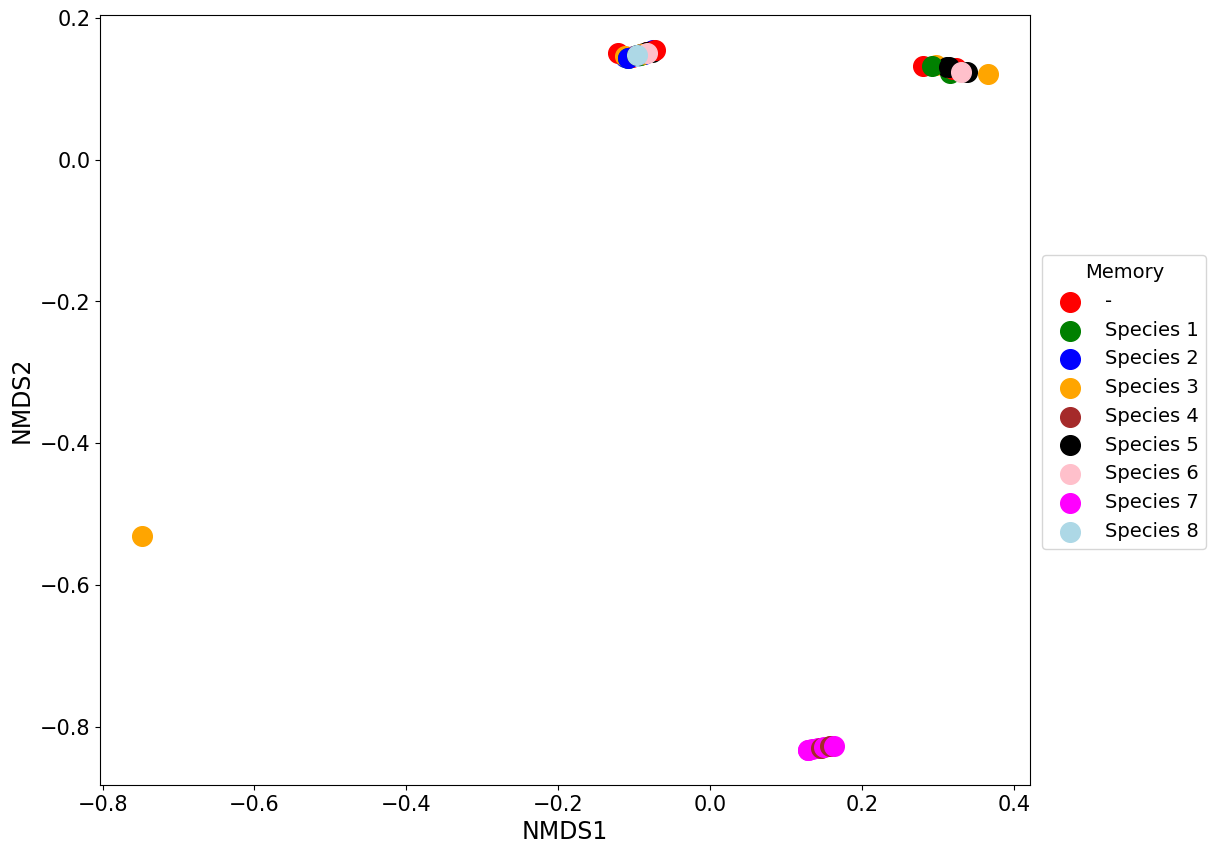

In [164]:
import matplotlib as mpl
import matplotlib.style as style
style.use('default')
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.figsize': [12, 10]})
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)


def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.2, 0.7), ncol = 1, title = 'Memory')
    
#label_df2 = nmds_df2.iloc[:, 3]
label_df2 = ['-', 'Species 1','Species 2','Species 3','Species 4','Species 5','Species 6','Species 7','Species 8']*8

colors = ['Red', 'Green', 'Blue', 'Orange', 'Brown', 'Black', 'Pink', 'Magenta', 'Lightblue'] * 8

for x,y,z,j in zip(python_nmds["MDS1"], python_nmds['MDS2'], label_df2, colors):
    plt.scatter(x,y, label = z, s = 200, c = j)
    #plt.legend(x)
    legend_without_duplicate_labels(plt)
    plt.ylabel('NMDS2', fontsize = 17)
    plt.xlabel('NMDS1', fontsize = 17)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    #plt.xlim(-1,10)
    #plt.ylim(-5,5)
    #plt.xscale('log')
    #plt.yscale('symlog')
    #plt.title('NMDS: All communities', fontsize = 16)
#plt.savefig('Supp_Fig6Bnew.svg', bbox_inches = 'tight')

## Hierarchical clustering

0.9879973418206772


([], [])

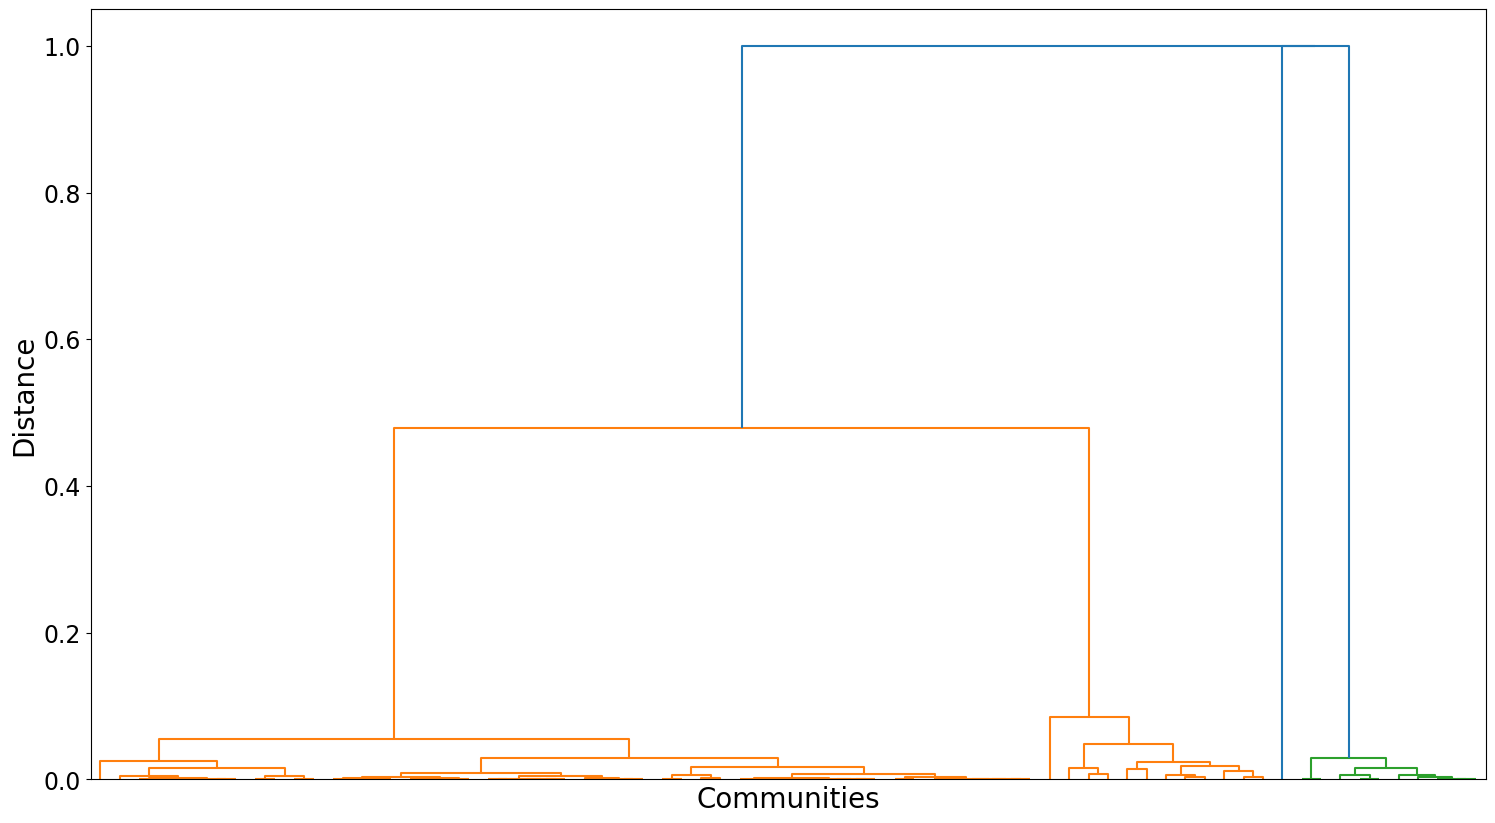

In [142]:
import matplotlib.style as style
style.use('default')

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

import matplotlib
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list, fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist, squareform

linkage_data = linkage(squareform(bc_matrix), method='complete')
dendrogram(linkage_data)

c, coph_dists = cophenet(linkage_data, pdist(bc_matrix))
print(c)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18, 10)
plt.xlabel("Communities", fontsize = 20)
plt.ylabel('Distance', fontsize = 20)
plt.yticks(fontsize = 17)
plt.xticks([], [])
#plt.title("Final Communities Set 2 avg ALL COMMS", fontsize = 20)
#plt.savefig('Supp_Fig6C_new.svg', bbox_inches = 'tight')

In [143]:
import scipy
#k = 3
clusters = fcluster(linkage_data,t = 0.4, criterion='distance', depth=3, R=None, monocrit=None)
clusters

array([2, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 1, 2, 3, 2, 1, 3,
       1, 1, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1], dtype=int32)

In [144]:
k = 3
cluster_ids_maxclust = fcluster(linkage_data, k, criterion='maxclust')
cluster_ids_maxclust

array([1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 1], dtype=int32)

In [145]:
python_nmds['cluster_id'] = clusters
python_nmds['cluster_id_maxclust'] = cluster_ids_maxclust
python_nmds

,Species,MDS1,MDS2,cluster_id,cluster_id_maxclust
0,No Sup,0.323384,0.128861,2,1
1,Sup1,-0.097605,0.146477,1,1
2,Sup2,-0.099528,0.145926,1,1
3,Sup3,-0.091419,0.148585,1,1
4,Sup4,-0.086416,0.150244,1,1
5,Sup5,-0.087188,0.149942,1,1
6,Sup6,0.313908,0.129193,2,1
7,Sup7,0.128231,-0.832291,3,2
8,Sup8,-0.086141,0.150329,1,1
9,No Sup,-0.077572,0.153056,1,1


Text(0, 0.5, 'NMDS2')

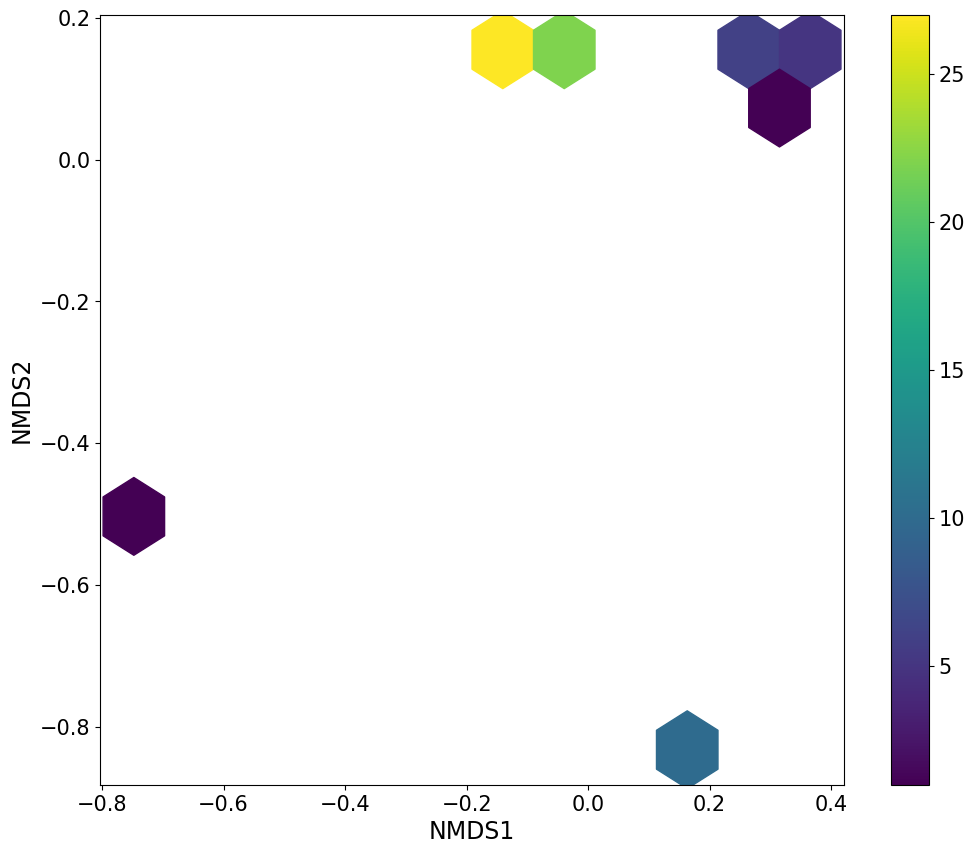

In [146]:
import matplotlib as mpl
mpl.style.use('default')

plt.figure(figsize=(12,10))
x = python_nmds['MDS1']
y = python_nmds['MDS2']

ax = plt.hexbin(x= x, y= y, gridsize = 11, cmap = 'viridis', marginals = False, mincnt=0.001)
#plt.xlim([-200,1100])
#plt.ylim([-5,5])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(15)

plt.xlabel('NMDS1', fontsize = 17)
plt.ylabel('NMDS2', fontsize = 17)
#plt.title("Final community states", fontsize = 22)

In [147]:
pos = [0,9,18,27,36,45,54,63]
sup_df = python_nmds.loc[[x+8 for x in pos],:]
print(sup_df)

   Species      MDS1      MDS2  cluster_id  cluster_id_maxclust
8     Sup8 -0.086141  0.150329           1                    1
17    Sup8 -0.091866  0.148391           1                    1
26    Sup8 -0.083921  0.151045           1                    1
35    Sup8 -0.100428  0.145605           1                    1
44    Sup8 -0.086463  0.150232           1                    1
53    Sup8 -0.093585  0.147853           1                    1
62    Sup8 -0.096580  0.146813           1                    1
71    Sup8 -0.096108  0.147017           1                    1


In [148]:
#colors = ['Red', 'Green', 'Blue', 'Orange', 'Brown', 'Black', 'Pink', 'Magenta', 'Lightblue'] * 8

Text(0.5, 1.0, 'Final community states : Memory Species 8')

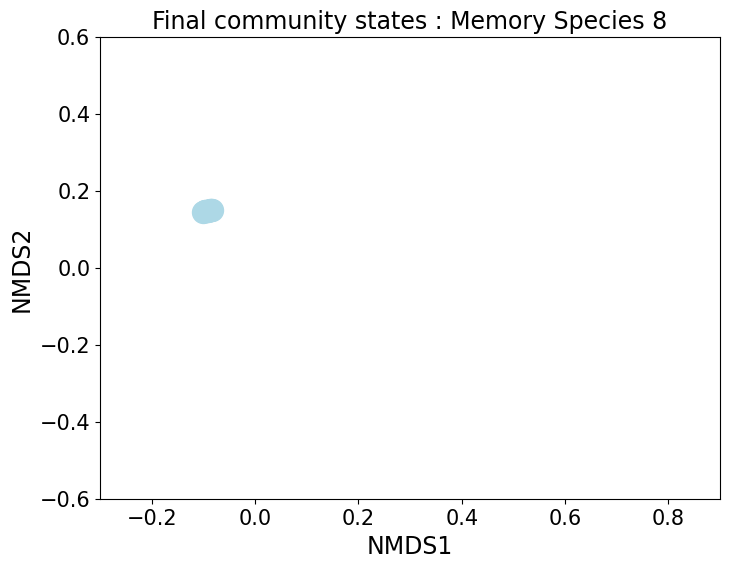

In [149]:
import matplotlib as mpl
mpl.style.use('default')

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

plt.figure(figsize=(8,6))
x = sup_df['MDS1']
y = sup_df['MDS2']

ax = plt.scatter(x= x, y= y, s = 250, color = 'Lightblue') #############
plt.xlim([-0.3,0.9])
plt.ylim([-0.6, 0.6])
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#cbar = plt.colorbar()
#for t in cbar.ax.get_yticklabels():
#    t.set_fontsize(15)
plt.xlabel('NMDS1', fontsize = 17)
plt.ylabel('NMDS2', fontsize = 17)
plt.title("Final community states : Memory Species 8", fontsize = 17) #########
#plt.savefig('Supp_Fig5Nnew.svg', bbox_inches = 'tight') #########

In [150]:
#Heatmap and Probability of transition to different states
from operator import itemgetter
pd.options.display.max_rows = 300

#print(cluster_ids_df2)
print(clusters)

Probs_list = []
#for n, i in zip(range(0,9),cluster_ids_df2):
for n, i in zip(range(0,9),clusters):
    j = []
    b = [n, n+9,n+18,n+27,n+36,n+45,n+54, n+63]
    #print(len(b))
    #j.append(itemgetter(*b)(cluster_ids_df2))
    j.append(itemgetter(*b)(clusters))
    print(j)
    Probs_list.append(j)

[2 1 1 1 1 1 2 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 2 2 1 2 1 2 1 3 1 2
 2 1 2 3 2 1 3 1 1 1 1 4 3 2 1 3 1 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 3 1]
[(2, 1, 1, 2, 2, 1, 1, 1)]
[(1, 1, 1, 2, 2, 1, 1, 1)]
[(1, 1, 1, 1, 1, 1, 1, 1)]
[(1, 1, 1, 2, 2, 4, 1, 1)]
[(1, 1, 1, 1, 3, 3, 1, 3)]
[(1, 1, 1, 2, 2, 2, 1, 1)]
[(2, 1, 1, 1, 1, 1, 2, 1)]
[(3, 3, 3, 3, 3, 3, 1, 3)]
[(1, 1, 1, 1, 1, 1, 1, 1)]


In [151]:
Probs = []
for x in Probs_list:
    Probs.append(list(x[0]))
    print(x)
Probs

[(2, 1, 1, 2, 2, 1, 1, 1)]
[(1, 1, 1, 2, 2, 1, 1, 1)]
[(1, 1, 1, 1, 1, 1, 1, 1)]
[(1, 1, 1, 2, 2, 4, 1, 1)]
[(1, 1, 1, 1, 3, 3, 1, 3)]
[(1, 1, 1, 2, 2, 2, 1, 1)]
[(2, 1, 1, 1, 1, 1, 2, 1)]
[(3, 3, 3, 3, 3, 3, 1, 3)]
[(1, 1, 1, 1, 1, 1, 1, 1)]


[[2, 1, 1, 2, 2, 1, 1, 1],
 [1, 1, 1, 2, 2, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 2, 2, 4, 1, 1],
 [1, 1, 1, 1, 3, 3, 1, 3],
 [1, 1, 1, 2, 2, 2, 1, 1],
 [2, 1, 1, 1, 1, 1, 2, 1],
 [3, 3, 3, 3, 3, 3, 1, 3],
 [1, 1, 1, 1, 1, 1, 1, 1]]

In [152]:
Probs[0]

[2, 1, 1, 2, 2, 1, 1, 1]

In [153]:
Prob_dfx = pd.DataFrame()
Prob_dfx['-'] = Probs[0]
for x,i in zip(Probs[1:], np.arange(1,10)):
    Prob_dfx[str(i)] = x

In [154]:
Prob_dfx

,-,1,2,3,4,5,6,7,8
0,2,1,1,1,1,1,2,3,1
1,1,1,1,1,1,1,1,3,1
2,1,1,1,1,1,1,1,3,1
3,2,2,1,2,1,2,1,3,1
4,2,2,1,2,3,2,1,3,1
5,1,1,1,4,3,2,1,3,1
6,1,1,1,1,1,1,2,1,1
7,1,1,1,1,3,1,1,3,1


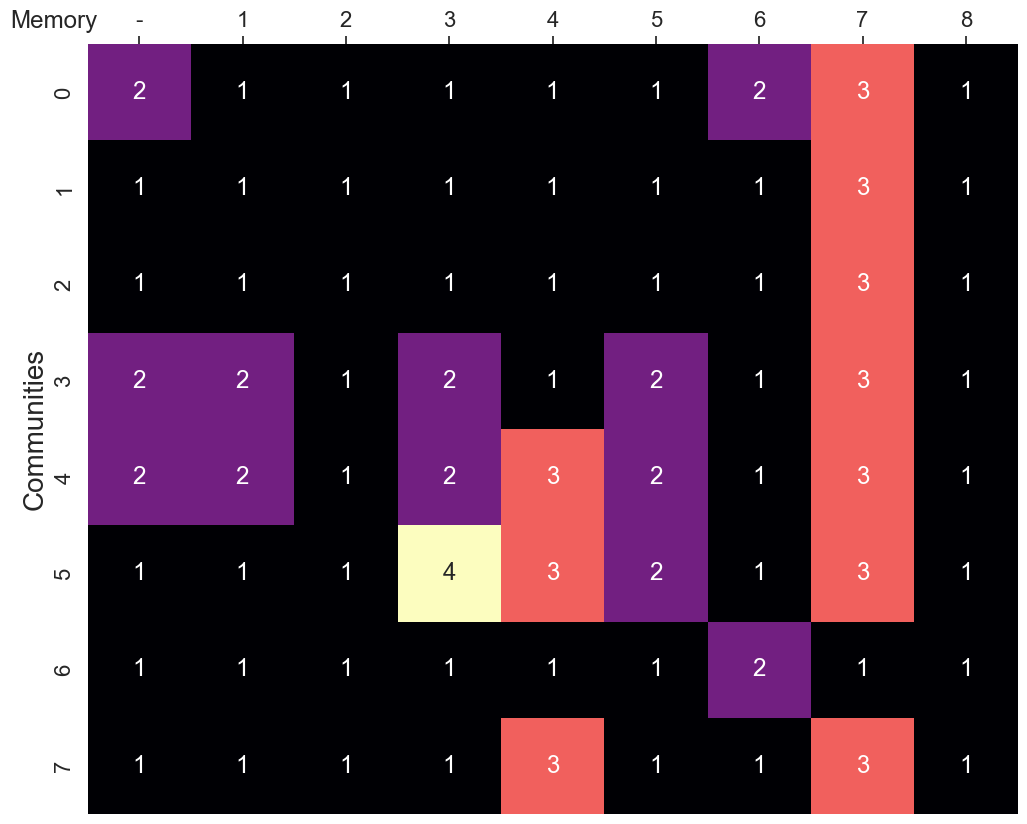

In [155]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

import seaborn as sns
sns.set(font_scale = 1.45)
ax = sns.heatmap(Prob_dfx, annot=True,cmap="magma", cbar = False)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 10)
ax.set(ylabel='Communities')
ax.text(-0.75, -0.17, "Memory")
ax.yaxis.label.set(fontsize=20)
ax.xaxis.tick_top()
#plt.savefig('Supp_Fig6Dnew.svg', bbox_inches = 'tight')

In [156]:
States = [1,2,3,4]

In [157]:
prob_sup = []
supss = Supsx[0:10]
for i in range(0,9):
    y = (Prob_dfx.iloc[:,i].value_counts().reindex(States[::1], fill_value=0))
    #print(y)
    prob_sup.append(y)
    
prob_sup

[-
 1    5
 2    3
 3    0
 4    0
 Name: count, dtype: int64,
 1
 1    6
 2    2
 3    0
 4    0
 Name: count, dtype: int64,
 2
 1    8
 2    0
 3    0
 4    0
 Name: count, dtype: int64,
 3
 1    5
 2    2
 3    0
 4    1
 Name: count, dtype: int64,
 4
 1    5
 2    0
 3    3
 4    0
 Name: count, dtype: int64,
 5
 1    5
 2    3
 3    0
 4    0
 Name: count, dtype: int64,
 6
 1    6
 2    2
 3    0
 4    0
 Name: count, dtype: int64,
 7
 1    1
 2    0
 3    7
 4    0
 Name: count, dtype: int64,
 8
 1    8
 2    0
 3    0
 4    0
 Name: count, dtype: int64]

In [158]:
prob_sup1 = []
for i in range(0,9):
    x = (prob_sup[i])
    x = [a/8 for a in x]
    print(x)
    prob_sup1.append(x)
    
prob_sup1

[0.625, 0.375, 0.0, 0.0]
[0.75, 0.25, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[0.625, 0.25, 0.0, 0.125]
[0.625, 0.0, 0.375, 0.0]
[0.625, 0.375, 0.0, 0.0]
[0.75, 0.25, 0.0, 0.0]
[0.125, 0.0, 0.875, 0.0]
[1.0, 0.0, 0.0, 0.0]


[[0.625, 0.375, 0.0, 0.0],
 [0.75, 0.25, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.625, 0.25, 0.0, 0.125],
 [0.625, 0.0, 0.375, 0.0],
 [0.625, 0.375, 0.0, 0.0],
 [0.75, 0.25, 0.0, 0.0],
 [0.125, 0.0, 0.875, 0.0],
 [1.0, 0.0, 0.0, 0.0]]

In [159]:
np.asarray(prob_sup1).shape
state1 = []
state2 = []
state3 = []
state4 = []
for x in prob_sup1:
    state1.append(x[0])
    state2.append(x[1])
    state3.append(x[2])
    #state4.append(x[3])
state3

[0.0, 0.0, 0.0, 0.0, 0.375, 0.0, 0.0, 0.875, 0.0]

[ 3.25  6.25  9.25 12.25 15.25 18.25 21.25 24.25]


/var/folders/_n/drkfc7xj0_b5jpq4c8c19f240000gn/T/ipykernel_26446/3009841799.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  magma = cm.get_cmap('magma', 12)


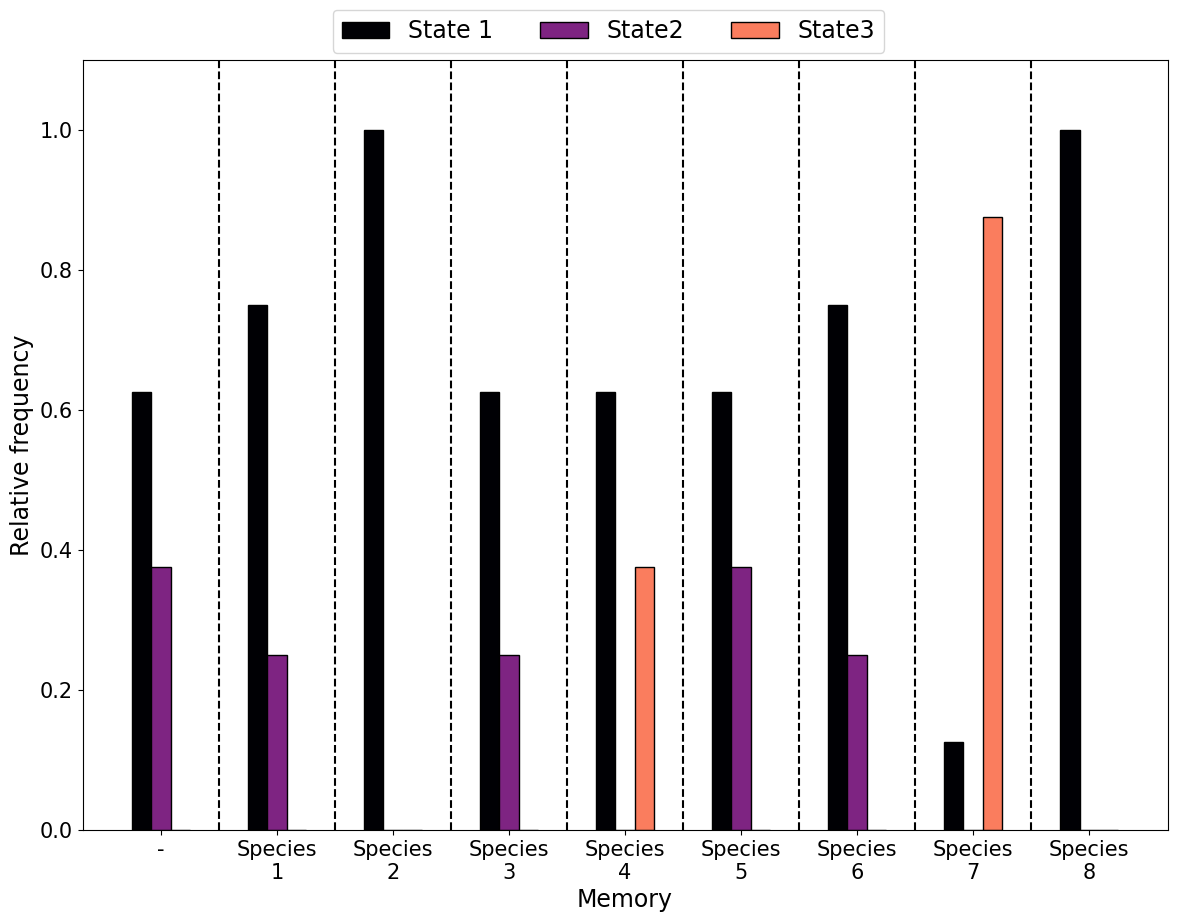

In [160]:

import matplotlib.style
import matplotlib as mpl
from matplotlib import cm
mpl.style.use('default')
plt.rcParams["figure.figsize"] = (14,10)

magma = cm.get_cmap('magma', 12)
print(magma)

lablex = ['-', 'Species\n1','Species\n2','Species\n3','Species\n4','Species\n5','Species\n6','Species\n7','Species\n8']

new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)

r = np.arange(1,27,3) 
width = 0.5
ax = plt.gca()
ax.grid(False)

plt.bar(r, state1, color = magma(0), 
         width = width, edgecolor = 'black', 
         label='State 1', align = 'edge') 
plt.bar(r + width, state2, color = magma(4), 
         width = width, edgecolor = 'black', 
         label='State2', align = 'edge')
plt.bar(r + 2*width, state3, color = magma(8), 
         width = width, edgecolor = 'black', 
         label='State3', align = 'edge')
# plt.bar(r + 3*width, state4, color = magma(12), 
#          width = width, edgecolor = 'black', 
#          label='State4', align = 'edge')

plt.xticks(ticks =  0.75 + np.arange(1,27,3),labels = lablex, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylim([0,1.1])
plt.ylabel('Relative frequency', fontsize = 17)
plt.xlabel('Memory', fontsize = 17)
plt.legend(fontsize = 17, bbox_to_anchor = [0.75,1.08], ncol = 4)

vlines = 2.25 + np.arange(1,24,3)
print(vlines)
for xc in vlines:
    plt.axvline(x=xc, linestyle = '--', color = 'black')
    

#plt.savefig('Supp_Fig6Enew.svg')


In [161]:
#Initial species composition for species SET 1
N1 = [1.0, 1.0, 10.0, 0.1, 10.0, 1.0, 1.0, 1.0]
N2 = [0.1, 10.0, 1.0, 10.0, 1.0, 1.0, 1.0, 10.0]
N3 = [0.1, 10.0, 0.1, 1.0, 1.0, 0.1, 1.0, 0.1]
N4 = [10.0, 0.1, 10.0, 1.0, 10.0, 0.1, 1.0, 1.0]
N5 = [1.0, 1.0, 1.0, 10.0, 0.1, 10.0, 1.0, 0.1]
N6 = [0.1, 0.1, 1.0, 1.0, 10.0, 0.1, 10.0, 1.0]
N7 = [0.1, 10.0, 0.1, 0.1, 1.0, 10.0, 0.1, 1.0]
N8 = [10.0, 10.0, 0.1, 0.1, 1.0, 0.1, 10.0, 0.1]

#Initial species composition for species SET 2
Nx1 = [1.0, 10.0, 0.1, 1.0, 0.1, 1.0, 0.1, 10.0]
Nx2 = [10.0, 0.1, 10.0, 10.0, 0.1, 0.1, 1.0, 0.1]
Nx3 = [0.1, 0.1, 1.0, 0.1, 10.0, 1.0, 10.0, 0.1]
Nx4 = [0.1, 0.1, 1.0, 1.0, 0.1, 10.0, 1.0, 1.0]
Nx5 = [1.0, 1.0, 10.0, 10.0, 0.1, 0.1, 1.0, 1.0]
Nx6 = [10.0, 0.1, 0.1, 0.1, 1.0, 0.1, 0.1, 0.1]
Nx7 = [0.1, 0.1, 1.0, 10.0, 0.1, 0.1, 1.0, 1.0]
Nx8 = [1.0, 1.0, 0.1, 1.0, 0.1, 10.0, 1.0, 0.1]

In [162]:
sp_n1 = [N1] + [N2] + [N3] + [N4] + [N5] + [N6] + [N7] + [N8]
sp_n2 = [Nx1] + [Nx2] + [Nx3] +[Nx4] + [Nx5] + [Nx6] + [Nx7] + [Nx8]

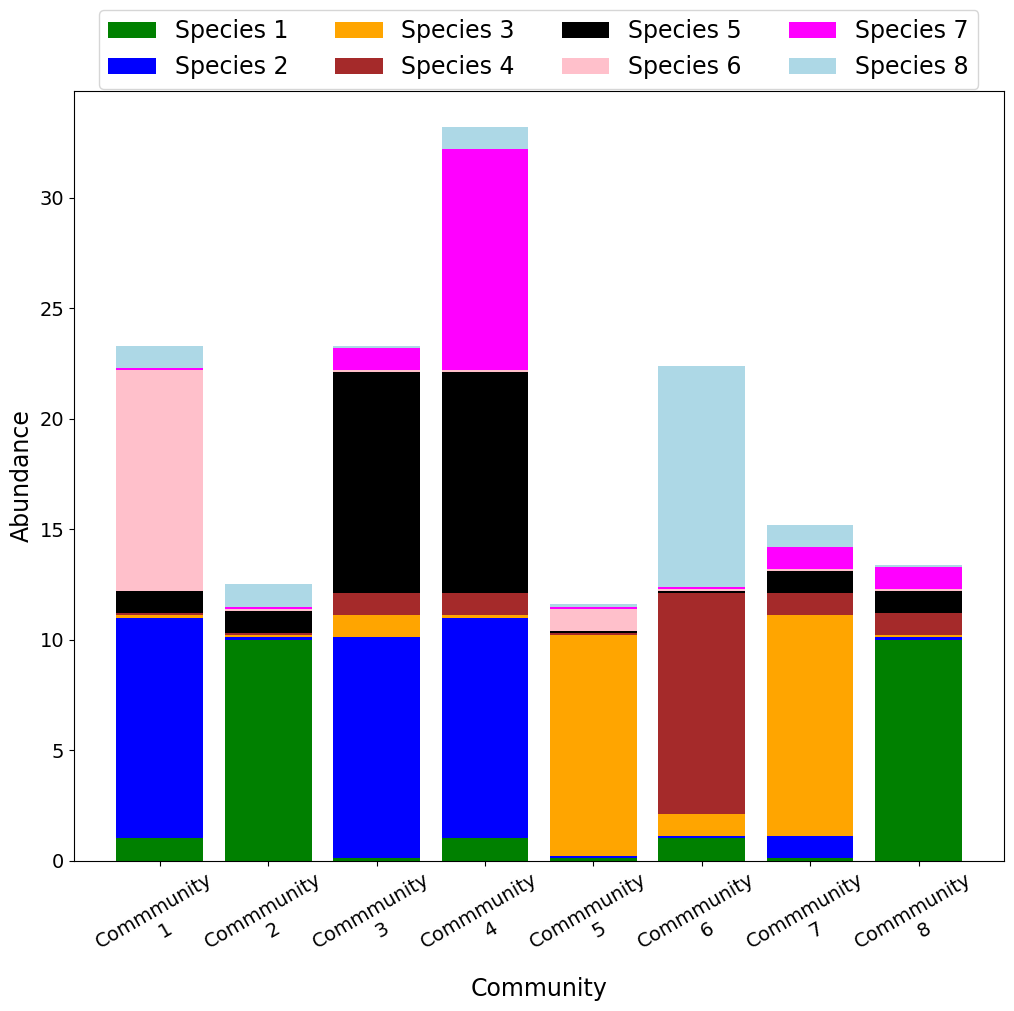

In [163]:
plt.rcParams["figure.figsize"] = (12,10)
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}
mpl.rcParams.update(new_rc_params)
commsxx = ['Commmunity\n1', 'Commmunity\n2','Commmunity\n3','Commmunity\n4','Commmunity\n5','Commmunity\n6','Commmunity\n7','Commmunity\n8']
labelx = ['Species 1','Species 2','Species 3','Species 4','Species 5','Species 6','Species 7','Species 8']
colors = ['Green', 'Blue', 'Orange', 'Brown', 'Black', 'Pink', 'Magenta', 'Lightblue']

bottom = [0] * 8

for i, category in enumerate(sp_n2):
    plt.bar(commsxx, category, bottom=bottom, label=labelx[i], color = colors[i])
    # Update bottom for the next category
    bottom = [left + right for left, right in zip(bottom, category)]
    plt.xticks(fontsize = 14, rotation = 30)
    plt.yticks(fontsize = 14)
    plt.ylabel('Abundance', fontsize = 17)
    plt.xlabel('Community', fontsize = 17)
    plt.legend(fontsize = 17, bbox_to_anchor = [0.985,1.12], ncol = 4)

#plt.savefig('Supp_Fig6Anew.svg', bbox_inches = 'tight')